In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = {
    'producto': ['Manzana', 'Manzana', 'Banana', 'Banana', 'Cereza', 'Cereza',  'Manzana', 'Banana', 'Cereza'],
    'categoria': ['Fruta', 'Fruta', 'Fruta', 'Fruta', 'Fruta', 'Fruta', 'Fruta', 'Fruta', 'Fruta'],
    'ventas': [50, 30, 20, 15, 10, 25, 45, 55, 40],
    'precio': [0.5, 0.5, 0.3, 0.3, 0.8, 0.8, 0.5, 0.3, 0.8],
    'fecha': pd.date_range(start='2024-01-01', periods=9, freq='D')
}

df = pd.DataFrame(data)
display(df)

,producto,categoria,ventas,precio,fecha
0,Manzana,Fruta,50,0.5,2024-01-01
1,Manzana,Fruta,30,0.5,2024-01-02
2,Banana,Fruta,20,0.3,2024-01-03
3,Banana,Fruta,15,0.3,2024-01-04
4,Cereza,Fruta,10,0.8,2024-01-05
5,Cereza,Fruta,25,0.8,2024-01-06
6,Manzana,Fruta,45,0.5,2024-01-07
7,Banana,Fruta,55,0.3,2024-01-08
8,Cereza,Fruta,40,0.8,2024-01-09


In [6]:
#Operaciones de Agregaciones: cuando realizamos una agrupacion respecto a alguna categoria del dataframe
#y a esa cierta agrupacion se le realiza alguna operacion tipica
#total de ventas por producto
total_ventas_por_producto = df.groupby('producto')['ventas'].sum()
display(total_ventas_por_producto)

producto
Banana      90
Cereza      75
Manzana    125
Name: ventas, dtype: int64

In [8]:
#promedio de precio unitario por producto
precio_promedio_por_producto = df.groupby('producto')['precio'].mean()
display(precio_promedio_por_producto)

producto
Banana     0.3
Cereza     0.8
Manzana    0.5
Name: precio, dtype: float64

In [12]:
#podemos realizar multiples funciones
resumen_ventas = df.groupby('producto')['ventas'].agg(['sum','mean','min','max'])
display(resumen_ventas)

,sum,mean,min,max
producto,,,,
Banana,90,30.000000,15,55
Cereza,75,25.000000,10,40
Manzana,125,41.666667,30,50


In [13]:
#realizarlo a mas de una columna
resumen_categoria = df.groupby(['categoria', 'producto']).agg(
    total_ventas=('ventas','sum'),
    precio_promedio=('precio','mean')
)
display(resumen_categoria)

total_ventas  precio_promedio
categoria producto                               
Fruta     Banana              90              0.3
          Cereza              75              0.8
          Manzana            125              0.5

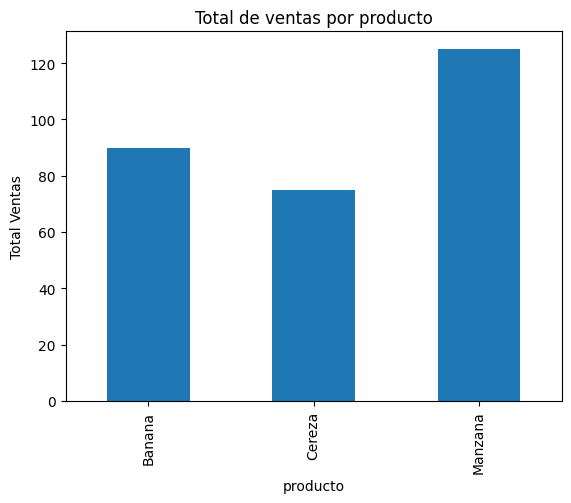

In [15]:
#visualizar los resultados
total_ventas_por_producto.plot(kind='bar')
plt.title('Total de ventas por producto')
plt.ylabel('Total Ventas')
plt.show()